# Human Resource Analytics data

<b>Dataset:</b> Human Resource Analytics data which contains informationof the employees working in a company

<b>Objective:</b> Using certain features about an employee, we have to predict if the employee will leave the company or not.

<b>Features:</b> 'satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'work_accident','promotion_last_5years', 'is_smoker', 'department', 'salary'

<b>Target Variable:</b> 'left'

In [1]:
## Importing all the required python libraries

import numpy as np
import pandas as pd
import datetime
import time
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

## Preparing data for Predictive Modeling

In [3]:
## Data Import

df = pd.read_csv('hr_data.csv')

In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'is_smoker', 'department', 'salary'],
      dtype='object')

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


### Assessing the target variable

In [6]:
df.left.value_counts()

no     11428
yes     3571
Name: left, dtype: int64

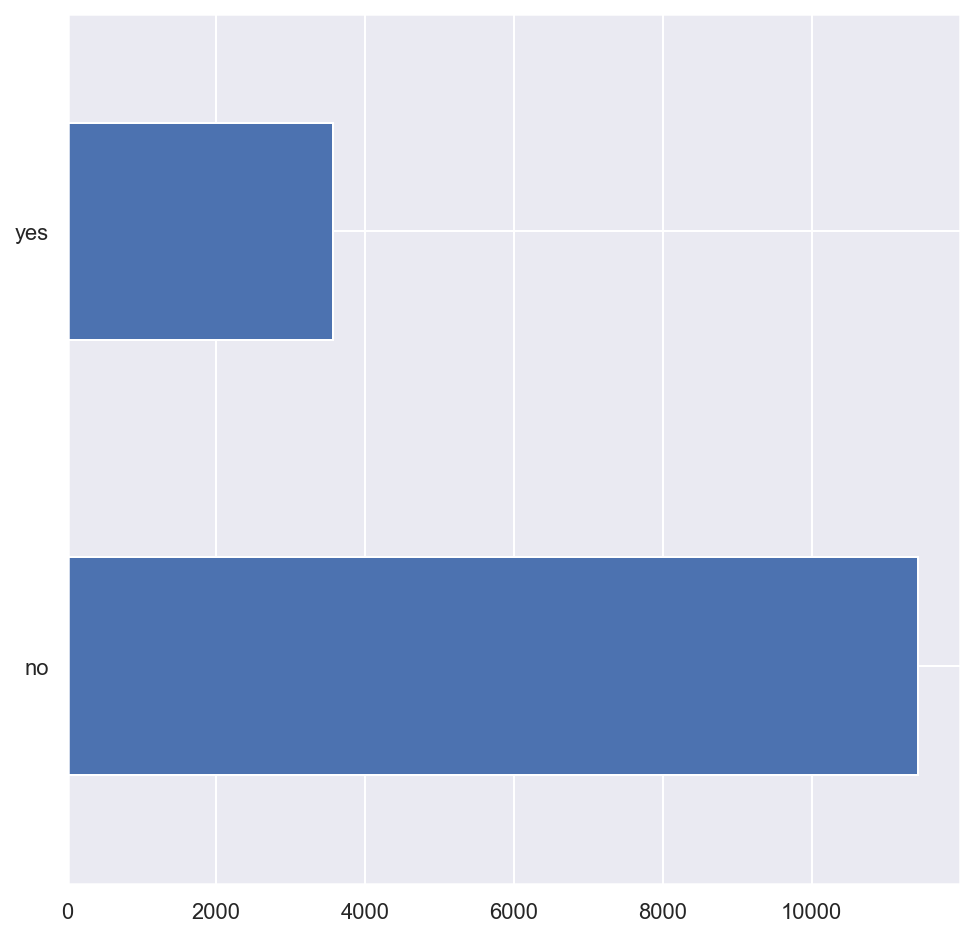

In [7]:
# How is it distributed?

df.left.value_counts().plot(kind='barh')
plt.show()

In [8]:
# How much missing data?

df.left.isnull().sum()

0

### Assessing the features

In [9]:
# Print datatypes

df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company       float64
work_accident              int64
left                      object
promotion_last_5years      int64
is_smoker                 object
department                object
salary                    object
dtype: object

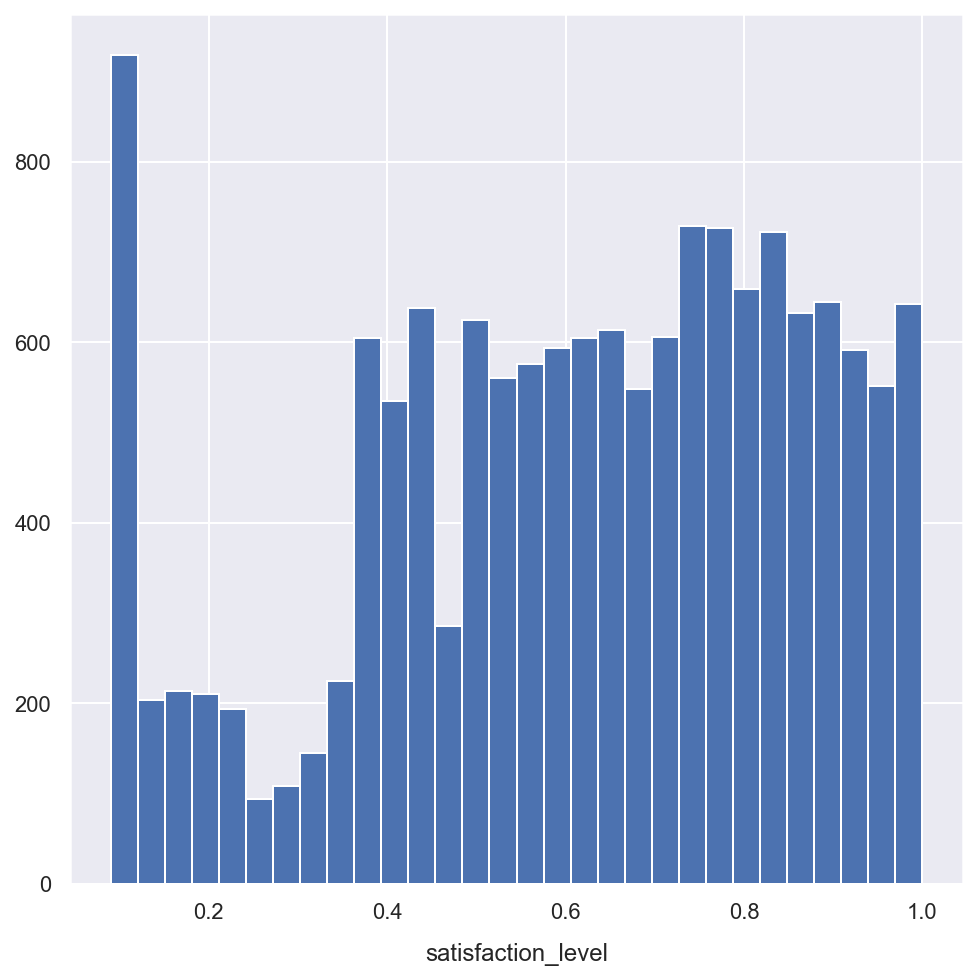

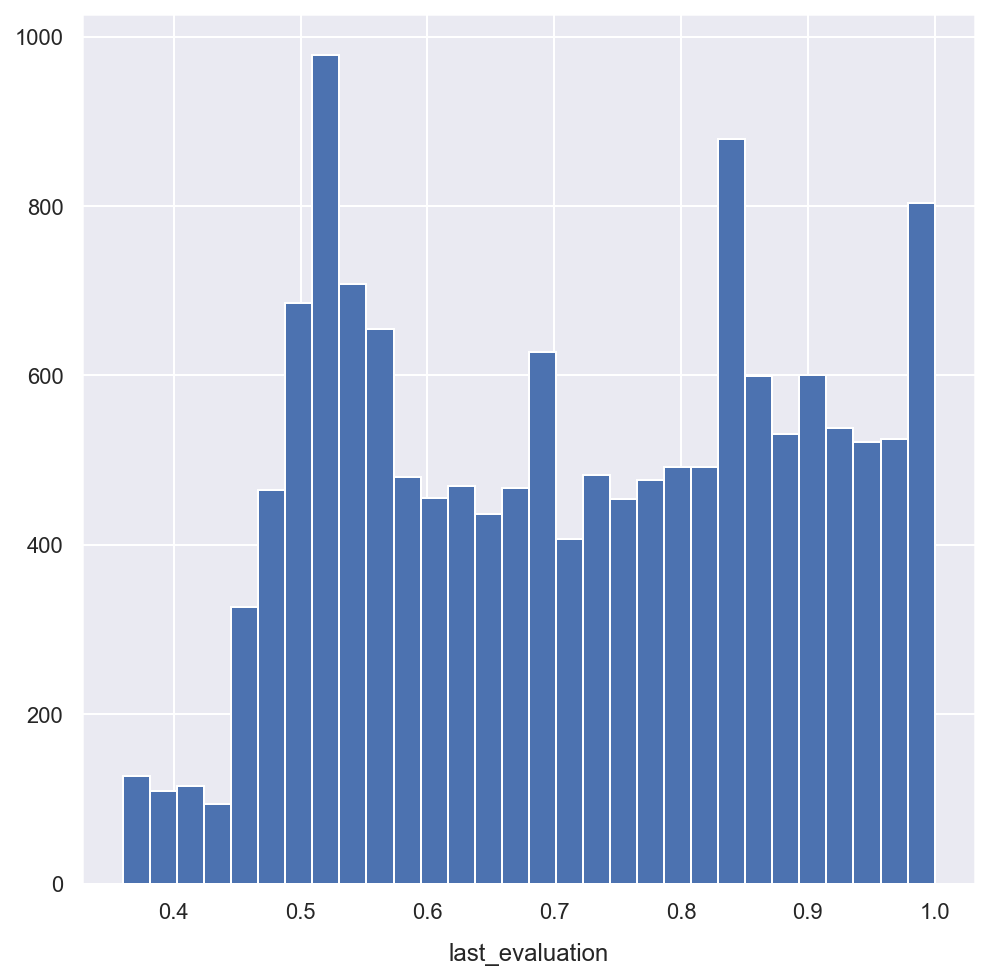

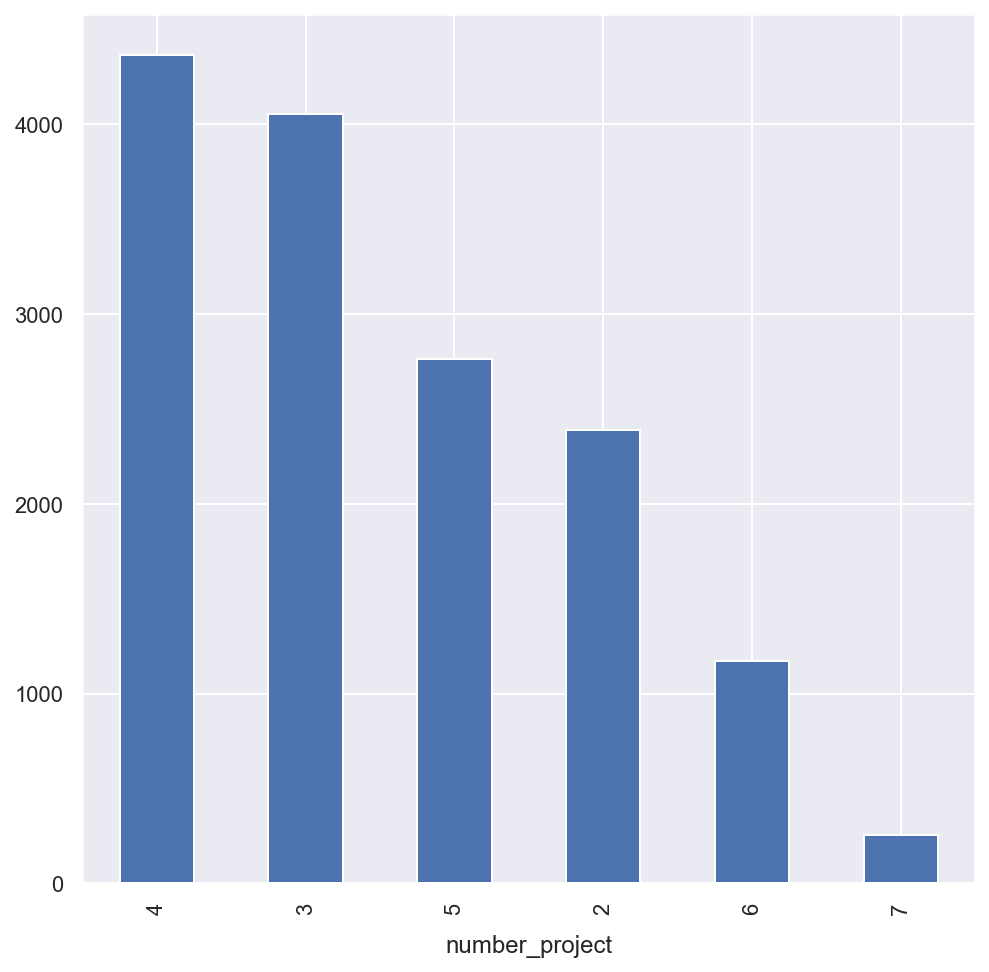

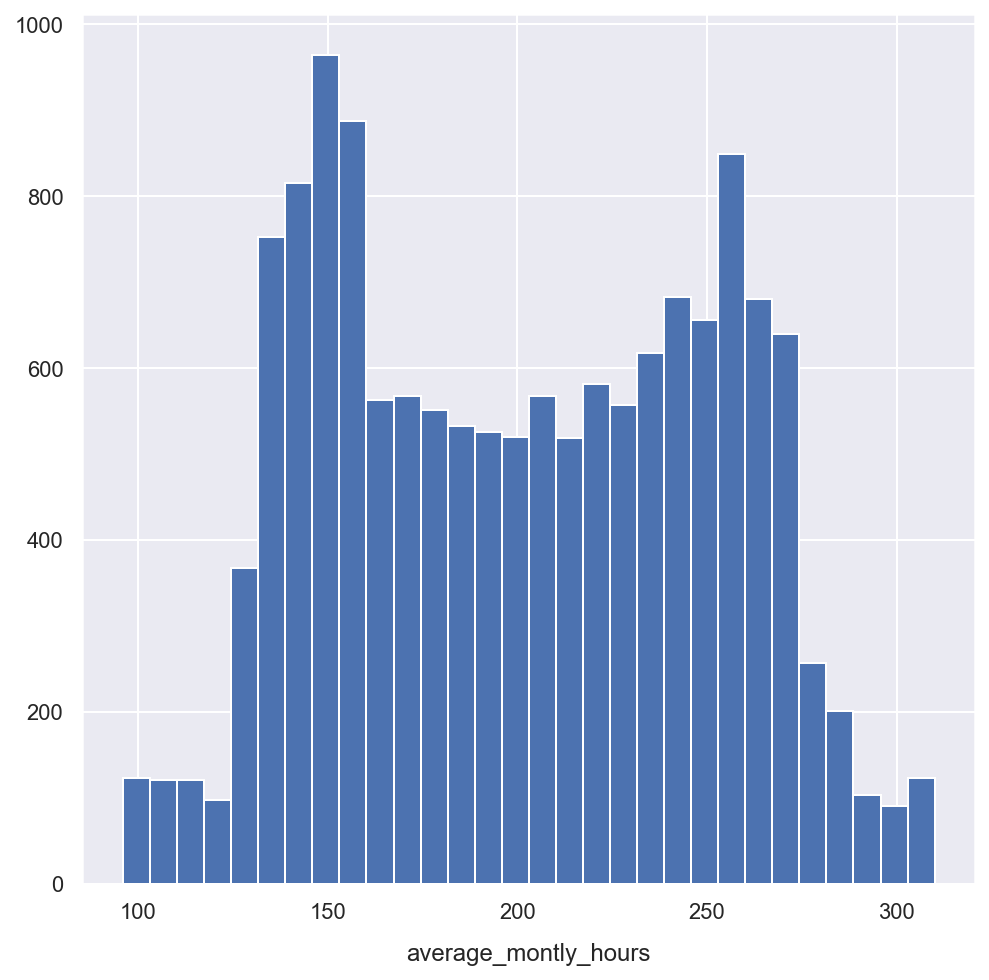

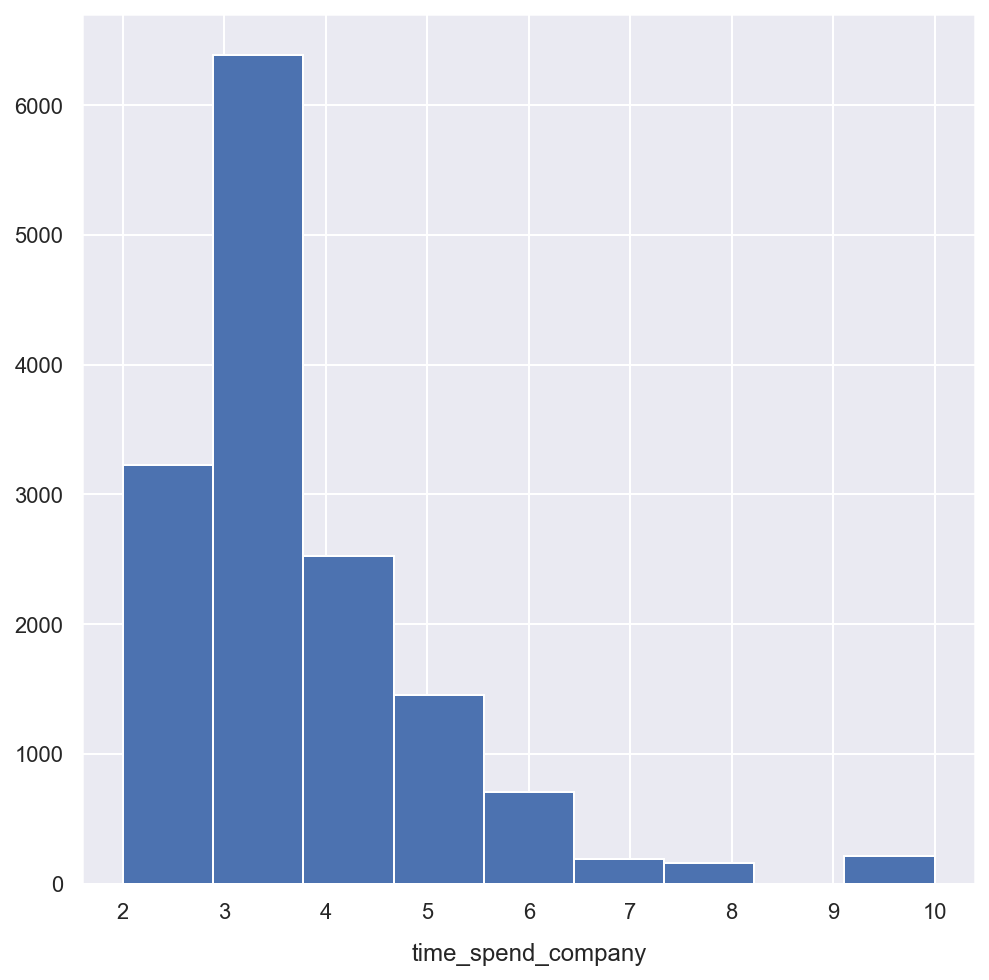

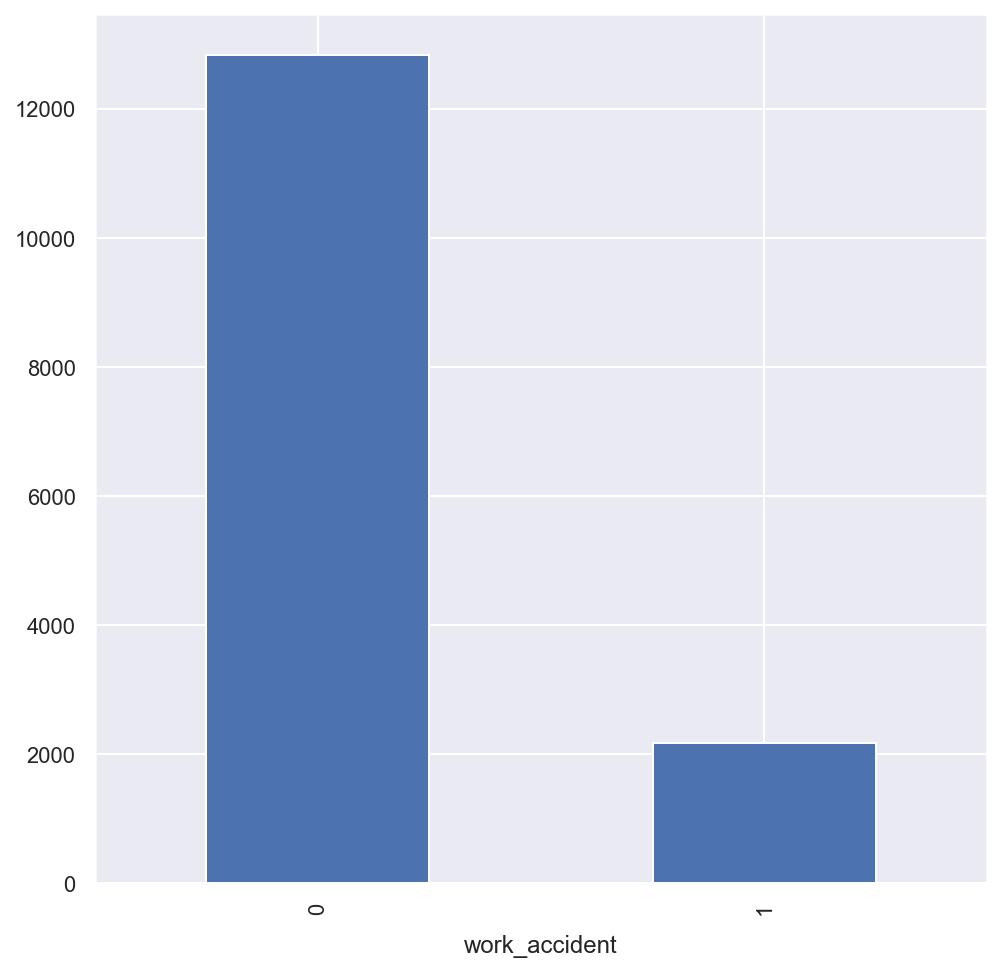

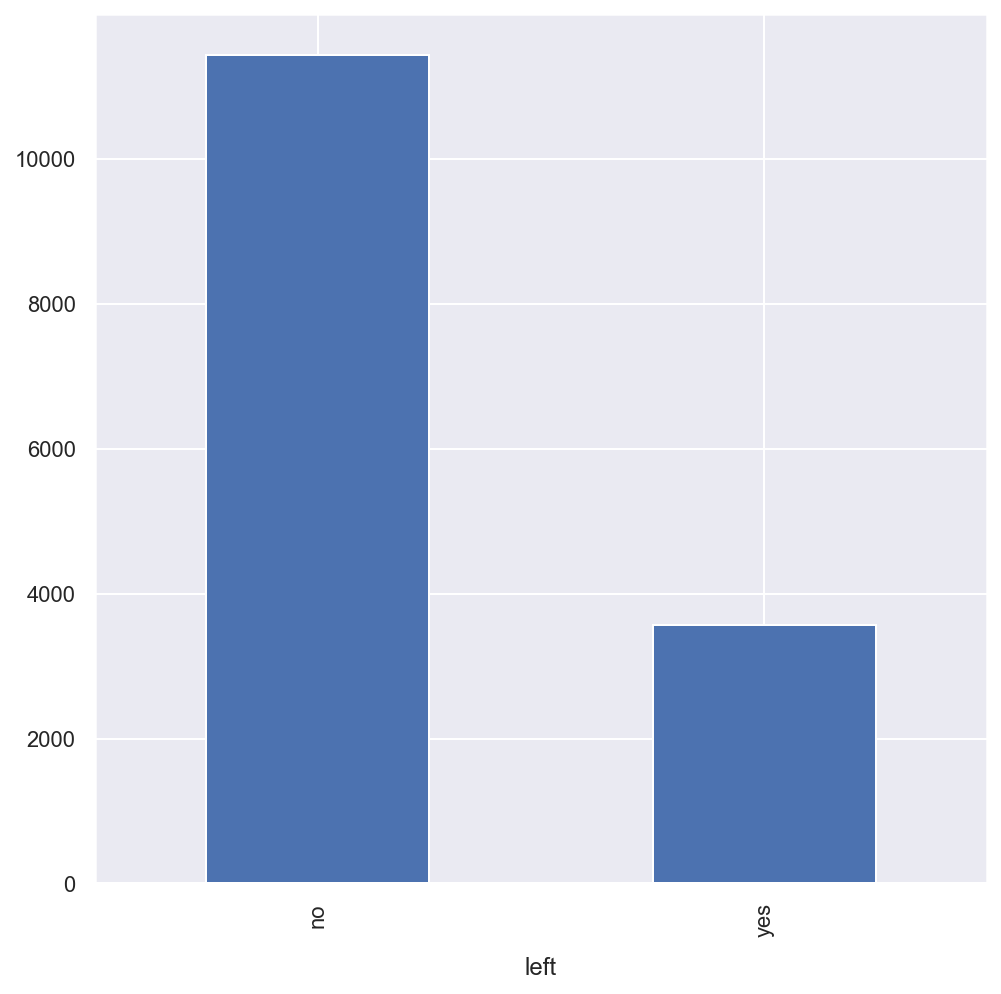

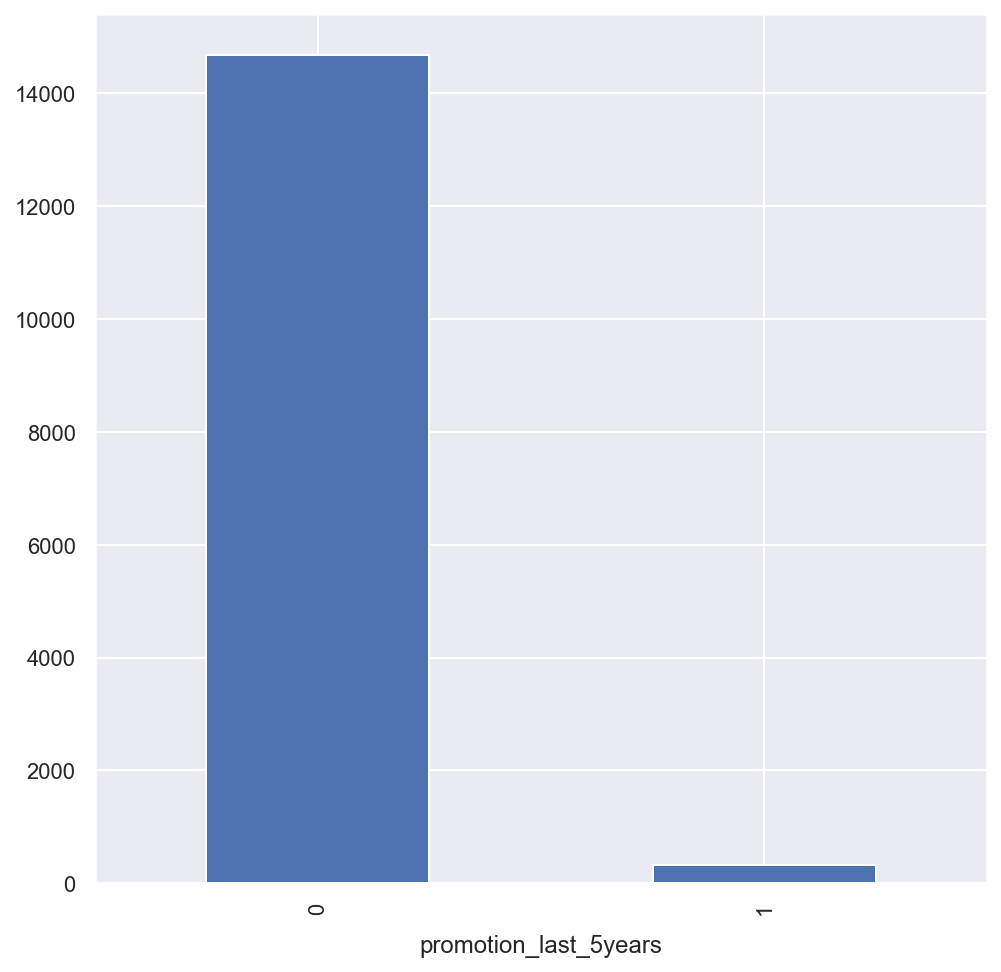

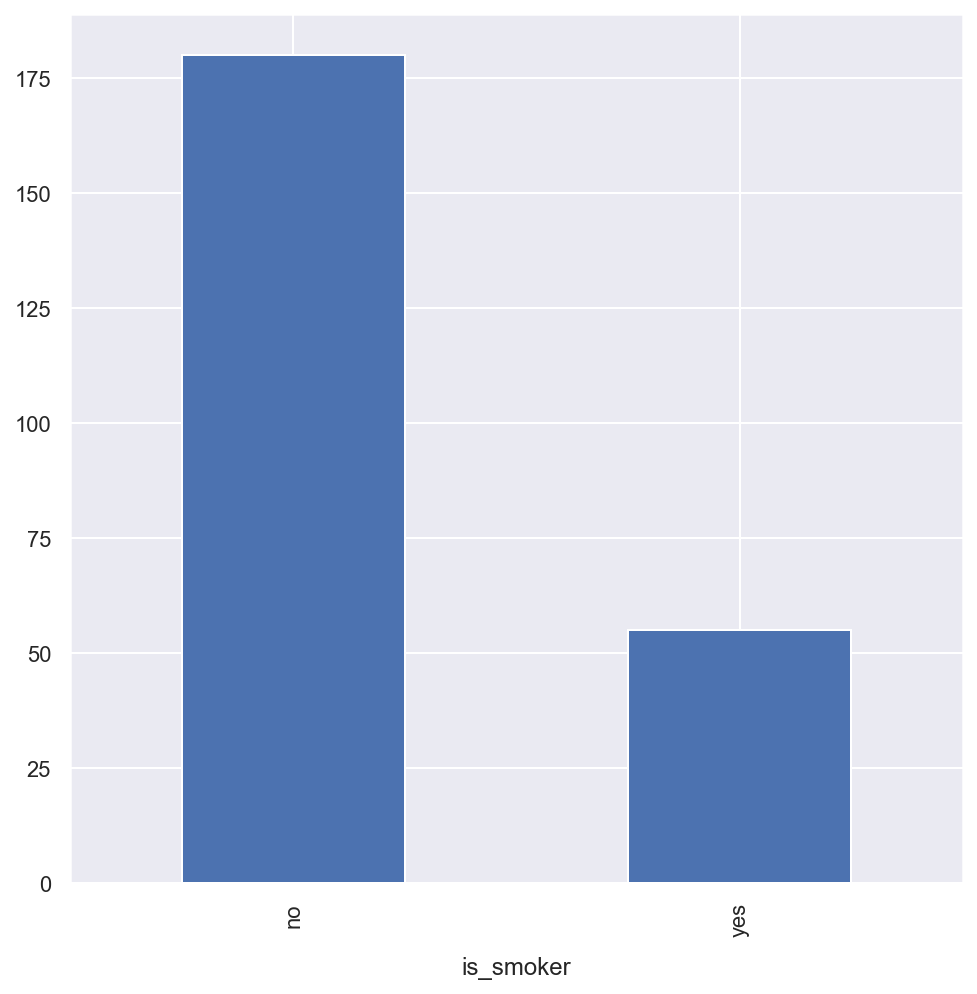

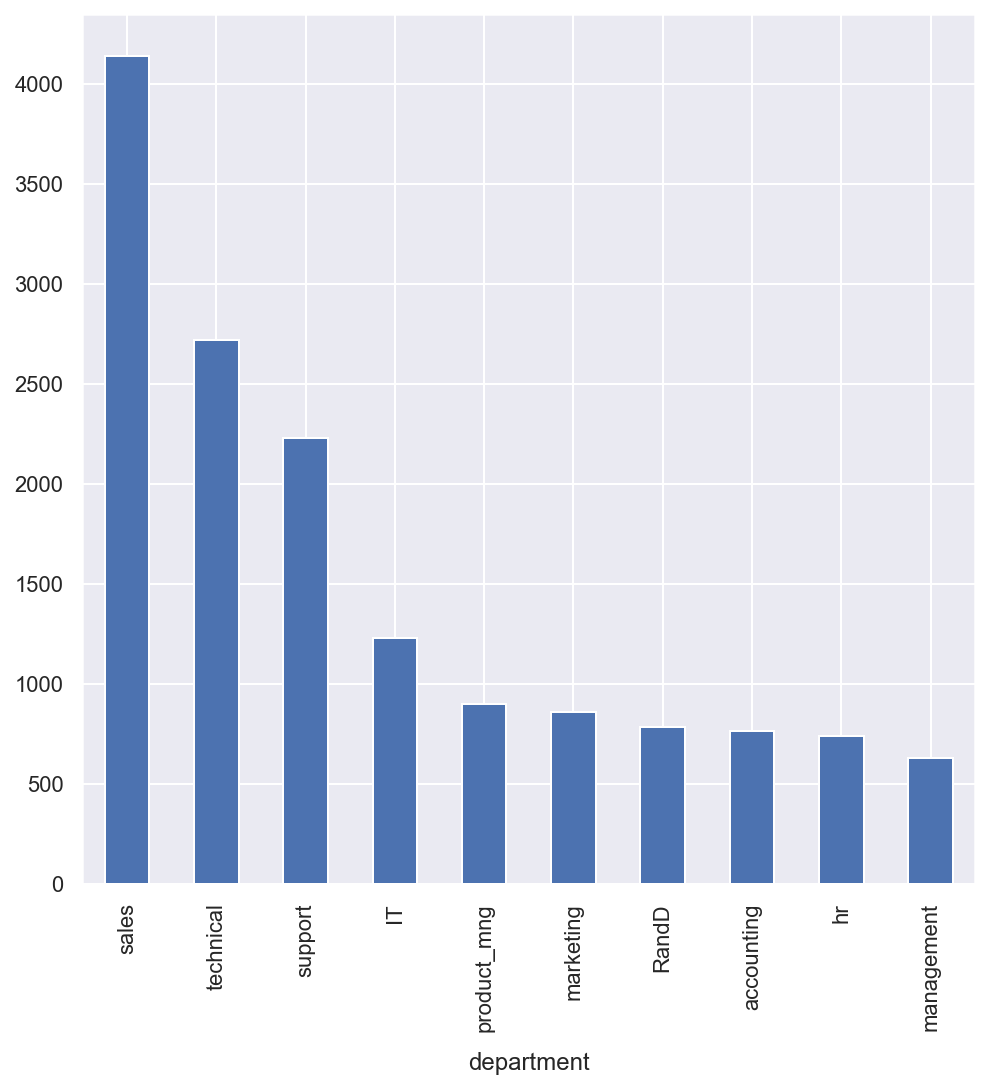

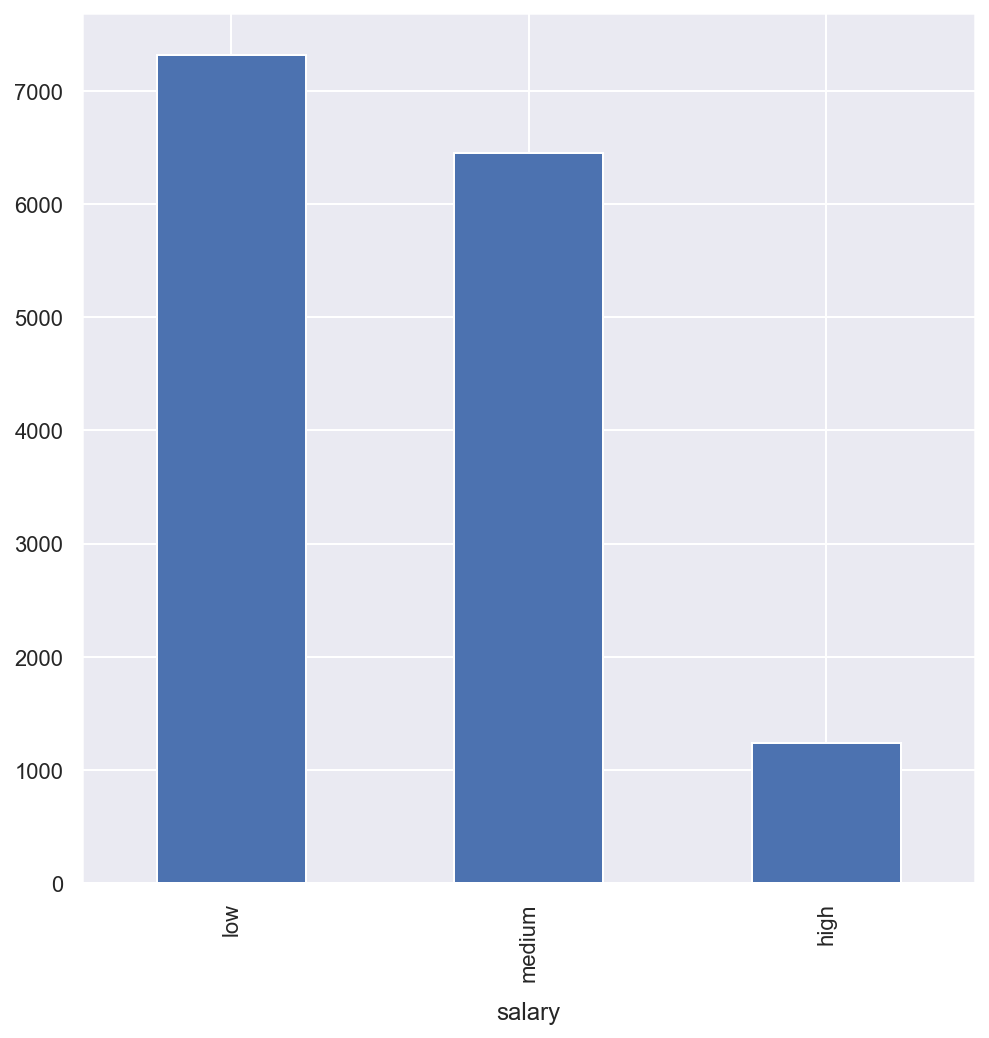

In [10]:
# Print the distibutions

for f in df.columns:
    fig = plt.figure()
    s = df[f]
    if s.dtype in ('float', 'int'):
        num_bins = min((30, len(df[f].unique())))
        s.hist(bins=num_bins)
    else:
        s.value_counts().plot.bar()    
    plt.xlabel(f)

In [11]:
# How many NaNs(%)?

df.isnull().sum() / len(df) * 100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      2.453497
time_spend_company        1.006734
work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
is_smoker                98.433229
department                0.000000
salary                    0.000000
dtype: float64

In [12]:
# is_smoker has lot of missing values and cannot be imputed. Let's remove the is_smoker column

del df['is_smoker']

In [13]:
# Filling the time_spend_company column null values with its median

fill_value = df.time_spend_company.median()
df.time_spend_company = df.time_spend_company.fillna(fill_value)

In [14]:
df.isnull().sum() / len(df) * 100

satisfaction_level       0.000000
last_evaluation          0.000000
number_project           0.000000
average_montly_hours     2.453497
time_spend_company       0.000000
work_accident            0.000000
left                     0.000000
promotion_last_5years    0.000000
department               0.000000
salary                   0.000000
dtype: float64

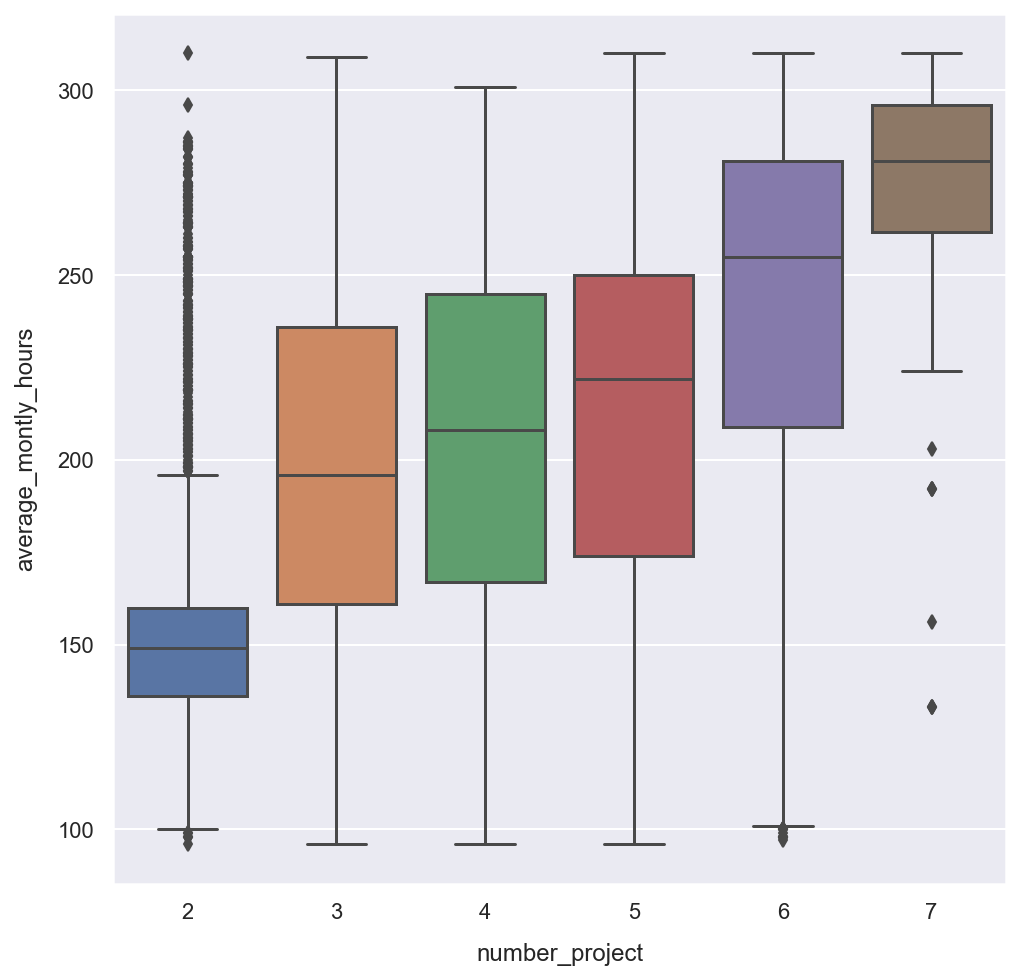

In [15]:
# By looking its name, average_montly_hours seems correlated to number_project. Let's check.

sns.boxplot(x='number_project', y='average_montly_hours', data=df)
plt.show()

In [16]:
# We can calculate fill values for average_montly_hours by their corrsponding number_project.
# Let's do it by creating several bins and storing them in a dictionary.

mean_per_project = (df.groupby('number_project').average_montly_hours.mean())
mean_per_project = dict(mean_per_project)
mean_per_project

{2: 160.16353543979506,
 3: 197.47882323104236,
 4: 205.07858315740089,
 5: 211.99962839093274,
 6: 238.73947368421054,
 7: 276.015873015873}

In [17]:
# Now, let's fill the average_monthly_hours with the appropriate values

fill_values = df.number_project.map(mean_per_project)
df.average_montly_hours = (df.average_montly_hours.fillna(fill_values))

In [18]:
# For the final time, making sure we are all clear of NaNs in our dataframe

assert df.isnull().sum().sum() == 0

In [19]:
# Converting categorical features to binary integer representation

df.left = df.left.map({'no': 0, 'yes': 1})
df = pd.get_dummies(df)

In [20]:
#Looking at the dummy variable columns

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [21]:
# Save to file

df.to_csv('Downloads/hr_data_processed.csv', index=False)